# Analyzing Otu sequences from 16S.

### Retrieve the otu sequences.

Otus.fasta file was obtained from preprocessing pipeline which merged the paired-end reads, trimmed off primers and filtered the reads, obtained oriented reads from silva reference db, retrieved unique reads, detected for chimeras and clustered the reads to obtain otus in fasta format.

In [1]:
input_file = "otus.fasta"

In [2]:
# importing packages
import Bio
from Bio import SeqIO

### Read/parse them 

In [3]:
for otu in SeqIO.parse(input_file, "fasta"):
    print(otu.id)
    print(otu.seq)
    print(len(otu.seq))


Otu1
TACGTAGGGGGCTAGCGTTATCCGGATTTACTGGGCGTAAAGGGTGCGTAGGCGGTCTTTCAAGTCAGGAGTTAAAGGCTACGGCTCAACCGTAGTAAGCTCCTGATACTGTCTGACTTGAGTGCAGGAGAGGAAAGCGGAATTCCCAGTGTAGCGGTGAAATGCGTAGATATTGGGAGGAACACCAGTAGCGAAGGCGGCTTTCTGGACTGTAACTGACGCTGAGGCACGAAAGCGTGGGGAGCAAACAGG
252
Otu2
TACGGAAGGTCCAGGCGTTATCCGGATTTATTGGGTTTAAAGGGAGCGCAGGCGGACTCTTAAGTCAGTTGTGAAATACGGCGGCTCAACCGTCGGACTGCAGTTGATACTGGGAGTCTTGAGTGCACACAGGGATGCTGGAATTCATGGTGTAGCGGTGAAATGCTCAGATATCATGAAGAACTCCGATCGCGAAGGCAGGTATCCGGGGTGCAACTGACGCTGAGGCTCGAAAGTGCGGGTATCAAACAGG
253
Otu3
TACGTATGTCGCAAGCGTTATCCGGATTTATTGGGCGTAAAGCGCGTCTAGGCGGTTTGGTAAGTCTGATGTGAAAATGCGGGGCTCAACTCCGTATTGCGTTGGAAACTGCCAAACTAGAGTACTGGAGAGGTAGGCGGAACTACAAGTGTAGAGGTGAAATTCGTAGATATTTGTAGGAATGCCGATGGGGAAGCCAGCCTACTGGACAGATACTGACGCTAAAGCGCGAAAGCGTGGGTAGCAAACAGG
252
Otu4
TACGTAGGTGGCAAGCGTTATCCGGATTTATTGGGCGTAAAGGGAACGCAGGCGGTCTTTTAAGTCTGATGTGAAAGCCTTCGGCTTAACCGGAGTAGTGCATTGGAAACTGGGAGACTTGAGTGCAGAAGAGGAGAGTGGAACTCCATGTGTAGCGGTGAAATGCGTAGATATATGGAAGAACACCAGTGGCGAAAGCGGCTCTCTG

In [4]:
otus = [otu.seq for otu in SeqIO.parse(input_file, "fasta")]
otus

[Seq('TACGTAGGGGGCTAGCGTTATCCGGATTTACTGGGCGTAAAGGGTGCGTAGGCG...AGG'),
 Seq('TACGGAAGGTCCAGGCGTTATCCGGATTTATTGGGTTTAAAGGGAGCGCAGGCG...AGG'),
 Seq('TACGTATGTCGCAAGCGTTATCCGGATTTATTGGGCGTAAAGCGCGTCTAGGCG...AGG'),
 Seq('TACGTAGGTGGCAAGCGTTATCCGGATTTATTGGGCGTAAAGGGAACGCAGGCG...AGG'),
 Seq('TACGTAGGTGGCGAGCGTTGTCCGGAATTATTGGGCGTAAAGAGCATGTAGGCG...GGG'),
 Seq('TACGGAAGGTCCGGGCGTTATCCGGATTTATTGGGTTTAAAGGGAGCGTAGGCC...AGG'),
 Seq('TACGTATGTCGCAAGCGTTATCCGGATTTATTGGGCGTAAAGCGCGTCTAGGTG...AGG'),
 Seq('TACGGAGGATCCGAGCGTTATCCGGATTTATTGGGTTTAAAGGGAGCGTAGGCG...AGG'),
 Seq('TACGTAGGGGGCAAGCGTTATCCGGATTTACTGGGTGTAAAGGGAGCGTAGACG...AGG'),
 Seq('AACGTAGGTCACAAGCGTTGTCCGGAATTACTGGGTGTAAAGGGAGCGCAGGCG...AGG'),
 Seq('TACGGAGGGTGCAAGCGTTAATCGGAATTACTGGGCGTAAAGCGCACGCAGGCG...AGG'),
 Seq('TACGGAGGATGCGAGCGTTATCCGGATTTATTGGGTTTAAAGGGAGCGCAGACG...AGG'),
 Seq('TACGTAGGGTGCAAGCGTTAATCGGAATTACTGGGCGTAAAGCGTGCGCAGGCG...AGG'),
 Seq('TACGTAGGTGGCAAGCGTTGTCCGGAATTATTGGGCGTAAAGGGAGCGCAGGCG...GGG'),
 Seq('TACGTAGGGGGCGA

In [5]:
#last otu sequence
otus[-1]

Seq('TACGGAGGATGCGAGCGTTATCCGGATTTATTGGGTTTAAAGGGAGCGCAGACG...AGG')

In [6]:
otu.seq

Seq('TACGGAGGATGCGAGCGTTATCCGGATTTATTGGGTTTAAAGGGAGCGCAGACG...AGG')

In [7]:
len(otu.seq)

253

In [8]:
otu.seq[243:]

Seq('AGCAAACAGG')

In [9]:
otu.id

'Otu215'

#### Analyzing the Otus in terms of length. 

In [10]:
length_otus = [len(otu) for otu in SeqIO.parse(input_file, "fasta")]
len(length_otus), min(length_otus), max(length_otus)

(215, 250, 254)

The input_file has 215 otus sequences the maximum length of the otus being 254bp while minimum length being 250bp.

#### Plotting a histogram of the Otus sequence length in basepairs.

In [11]:
#importing packages
import matplotlib.pylab as plt

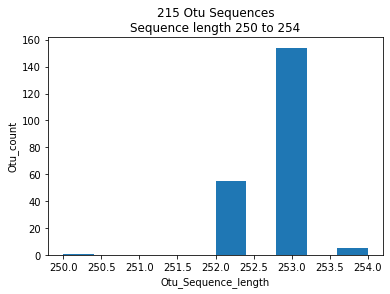

<Figure size 432x288 with 0 Axes>

In [12]:
#plotting histogram
plt.hist(length_otus)
plt.title("%i Otu Sequences\nSequence length %i to %i" % (len(length_otus), min(length_otus), max(length_otus)))
plt.xlabel("Otu_Sequence_length")
plt.ylabel("Otu_count")
plt.show()
plt.savefig("Otus_seq_length")

#### Analyzing the GC_content of the otus

In [13]:
#importing packages
from Bio.SeqUtils import GC

In [14]:
GC_values = sorted(GC(otu.seq) for otu in SeqIO.parse(input_file, "fasta"))
GC_values

[46.24505928853755,
 47.03557312252964,
 47.430830039525695,
 47.430830039525695,
 47.430830039525695,
 47.430830039525695,
 47.61904761904762,
 47.63779527559055,
 47.82608695652174,
 48.22134387351779,
 48.22134387351779,
 48.41269841269841,
 48.616600790513836,
 48.616600790513836,
 48.616600790513836,
 48.616600790513836,
 48.80952380952381,
 49.01185770750988,
 49.01185770750988,
 49.20634920634921,
 49.40711462450593,
 49.40711462450593,
 49.6031746031746,
 49.6031746031746,
 49.6031746031746,
 49.6031746031746,
 49.80237154150198,
 49.80237154150198,
 49.80237154150198,
 49.80237154150198,
 49.80237154150198,
 50.0,
 50.0,
 50.19762845849802,
 50.19762845849802,
 50.3968253968254,
 50.3968253968254,
 50.3968253968254,
 50.3968253968254,
 50.3968253968254,
 50.59288537549407,
 50.59288537549407,
 50.59288537549407,
 50.59288537549407,
 50.59288537549407,
 50.59288537549407,
 50.79365079365079,
 50.98814229249012,
 50.98814229249012,
 50.98814229249012,
 50.98814229249012,
 51.190

In [15]:
len(GC_values), min(GC_values), max(GC_values)

(215, 46.24505928853755, 69.56521739130434)

#### Plotting the GC content across in all the otu sequences.

In [16]:
#importing plot from matplotlib
import matplotlib.pylab as plt

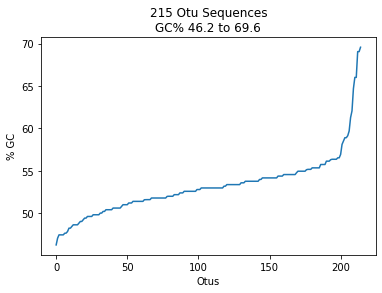

<Figure size 432x288 with 0 Axes>

In [17]:
#plotting the GC_content
plt.plot(GC_values)
plt.title("%i Otu Sequences\nGC%% %0.1f to %0.1f" % (len(GC_values), min(GC_values), max(GC_values)))
plt.xlabel("Otus")
plt.ylabel("% GC")
plt.show()
plt.savefig("Percent_GC")

### Converting the DNA sequences to RNA to Protein.

Transcription DNA converted to mRNA.

In [18]:
# import Seq package
from Bio.Seq import Seq

In [19]:
otu_mrna= [otu.seq.transcribe() for otu in SeqIO.parse(input_file, "fasta")]
otu_mrna

[Seq('UACGUAGGGGGCUAGCGUUAUCCGGAUUUACUGGGCGUAAAGGGUGCGUAGGCG...AGG'),
 Seq('UACGGAAGGUCCAGGCGUUAUCCGGAUUUAUUGGGUUUAAAGGGAGCGCAGGCG...AGG'),
 Seq('UACGUAUGUCGCAAGCGUUAUCCGGAUUUAUUGGGCGUAAAGCGCGUCUAGGCG...AGG'),
 Seq('UACGUAGGUGGCAAGCGUUAUCCGGAUUUAUUGGGCGUAAAGGGAACGCAGGCG...AGG'),
 Seq('UACGUAGGUGGCGAGCGUUGUCCGGAAUUAUUGGGCGUAAAGAGCAUGUAGGCG...GGG'),
 Seq('UACGGAAGGUCCGGGCGUUAUCCGGAUUUAUUGGGUUUAAAGGGAGCGUAGGCC...AGG'),
 Seq('UACGUAUGUCGCAAGCGUUAUCCGGAUUUAUUGGGCGUAAAGCGCGUCUAGGUG...AGG'),
 Seq('UACGGAGGAUCCGAGCGUUAUCCGGAUUUAUUGGGUUUAAAGGGAGCGUAGGCG...AGG'),
 Seq('UACGUAGGGGGCAAGCGUUAUCCGGAUUUACUGGGUGUAAAGGGAGCGUAGACG...AGG'),
 Seq('AACGUAGGUCACAAGCGUUGUCCGGAAUUACUGGGUGUAAAGGGAGCGCAGGCG...AGG'),
 Seq('UACGGAGGGUGCAAGCGUUAAUCGGAAUUACUGGGCGUAAAGCGCACGCAGGCG...AGG'),
 Seq('UACGGAGGAUGCGAGCGUUAUCCGGAUUUAUUGGGUUUAAAGGGAGCGCAGACG...AGG'),
 Seq('UACGUAGGGUGCAAGCGUUAAUCGGAAUUACUGGGCGUAAAGCGUGCGCAGGCG...AGG'),
 Seq('UACGUAGGUGGCAAGCGUUGUCCGGAAUUAUUGGGCGUAAAGGGAGCGCAGGCG...GGG'),
 Seq('UACGUAGGGGGCGA

In [20]:
otu_mrna= [otu.id for otu in SeqIO.parse(input_file, "fasta")]
otu_mrna

['Otu1',
 'Otu2',
 'Otu3',
 'Otu4',
 'Otu5',
 'Otu6',
 'Otu7',
 'Otu8',
 'Otu9',
 'Otu10',
 'Otu11',
 'Otu12',
 'Otu13',
 'Otu14',
 'Otu15',
 'Otu16',
 'Otu17',
 'Otu18',
 'Otu19',
 'Otu20',
 'Otu21',
 'Otu22',
 'Otu23',
 'Otu24',
 'Otu25',
 'Otu26',
 'Otu27',
 'Otu28',
 'Otu29',
 'Otu30',
 'Otu31',
 'Otu32',
 'Otu33',
 'Otu34',
 'Otu35',
 'Otu36',
 'Otu37',
 'Otu38',
 'Otu39',
 'Otu40',
 'Otu41',
 'Otu42',
 'Otu43',
 'Otu44',
 'Otu45',
 'Otu46',
 'Otu47',
 'Otu48',
 'Otu49',
 'Otu50',
 'Otu51',
 'Otu52',
 'Otu53',
 'Otu54',
 'Otu55',
 'Otu56',
 'Otu57',
 'Otu58',
 'Otu59',
 'Otu60',
 'Otu61',
 'Otu62',
 'Otu63',
 'Otu64',
 'Otu65',
 'Otu66',
 'Otu67',
 'Otu68',
 'Otu69',
 'Otu70',
 'Otu71',
 'Otu72',
 'Otu73',
 'Otu74',
 'Otu75',
 'Otu76',
 'Otu77',
 'Otu78',
 'Otu79',
 'Otu80',
 'Otu81',
 'Otu82',
 'Otu83',
 'Otu84',
 'Otu85',
 'Otu86',
 'Otu87',
 'Otu88',
 'Otu89',
 'Otu90',
 'Otu91',
 'Otu92',
 'Otu93',
 'Otu94',
 'Otu95',
 'Otu96',
 'Otu97',
 'Otu98',
 'Otu99',
 'Otu100',
 'Otu101

In [21]:
for otu in SeqIO.parse(input_file, "fasta"):
    print(otu.id)
    print(otu.seq.transcribe())

Otu1
UACGUAGGGGGCUAGCGUUAUCCGGAUUUACUGGGCGUAAAGGGUGCGUAGGCGGUCUUUCAAGUCAGGAGUUAAAGGCUACGGCUCAACCGUAGUAAGCUCCUGAUACUGUCUGACUUGAGUGCAGGAGAGGAAAGCGGAAUUCCCAGUGUAGCGGUGAAAUGCGUAGAUAUUGGGAGGAACACCAGUAGCGAAGGCGGCUUUCUGGACUGUAACUGACGCUGAGGCACGAAAGCGUGGGGAGCAAACAGG
Otu2
UACGGAAGGUCCAGGCGUUAUCCGGAUUUAUUGGGUUUAAAGGGAGCGCAGGCGGACUCUUAAGUCAGUUGUGAAAUACGGCGGCUCAACCGUCGGACUGCAGUUGAUACUGGGAGUCUUGAGUGCACACAGGGAUGCUGGAAUUCAUGGUGUAGCGGUGAAAUGCUCAGAUAUCAUGAAGAACUCCGAUCGCGAAGGCAGGUAUCCGGGGUGCAACUGACGCUGAGGCUCGAAAGUGCGGGUAUCAAACAGG
Otu3
UACGUAUGUCGCAAGCGUUAUCCGGAUUUAUUGGGCGUAAAGCGCGUCUAGGCGGUUUGGUAAGUCUGAUGUGAAAAUGCGGGGCUCAACUCCGUAUUGCGUUGGAAACUGCCAAACUAGAGUACUGGAGAGGUAGGCGGAACUACAAGUGUAGAGGUGAAAUUCGUAGAUAUUUGUAGGAAUGCCGAUGGGGAAGCCAGCCUACUGGACAGAUACUGACGCUAAAGCGCGAAAGCGUGGGUAGCAAACAGG
Otu4
UACGUAGGUGGCAAGCGUUAUCCGGAUUUAUUGGGCGUAAAGGGAACGCAGGCGGUCUUUUAAGUCUGAUGUGAAAGCCUUCGGCUUAACCGGAGUAGUGCAUUGGAAACUGGGAGACUUGAGUGCAGAAGAGGAGAGUGGAACUCCAUGUGUAGCGGUGAAAUGCGUAGAUAUAUGGAAGAACACCAGUGGCGAAAGCGGCUCUCUGGUCUGUAACUGA

### Translation
The messenger RNA is converted to protein sequence with the aid of RNA polymerase. Seq translate() function is used on the mRNA. 

However, you can obtain a protein sequence directly from the coding DNA sequence using the same function. 

In [22]:
for otu in SeqIO.parse(input_file, "fasta"):
    print(otu.id)
    print(otu.seq.translate(table =11))

Otu1
YVGG*RYPDLLGVKGA*AVFQVRS*RLRLNRSKLLILSDLSAGEESGIPSVAVKCVDIGRNTSSEGGFLDCN*R*GTKAWGANR
Otu2
YGRSRRYPDLLGLKGAQADS*VSCEIRRLNRRTAVDTGSLECTQGCWNSWCSGEMLRYHEELRSRRQVSGVQLTLRLESAGIKQ
Otu3
YVCRKRYPDLLGVKRV*AVW*V*CENAGLNSVLRWKLPN*STGEVGGTTSVEVKFVDICRNADGEASLLDRY*R*SAKAWVANR
Otu4
YVGGKRYPDLLGVKGTQAVF*V*CESLRLNRSSALETGRLECRRGEWNSMCSGEMRRYMEEHQWRKRLSGL*LTLRFESVGSKQ
Otu5
YVGGERCPELLGVKSM*AVS*VWSENAGLNPVWLWILGDLSAGEERGIPSVAVKCVDIGRNTSGEGAFLDCV*R*DAKARVANG
Otu6
YGRSGRYPDLLGLKGA*AGD*ACCEM*MLNI*TAARTGFLEYAQSGRNSWCSGEMLRYHEELRLRRQLTGAQLTLKLESAGIEQ
Otu7
YVCRKRYPDLLGVKRV*VVW*V*CENAGLNSVLRWKLPN*SIGEVGGTTSVEVKFVDICRNADREVSSLDEY*H*SAKAWGANR
Otu8
YGGSERYPDLLGLKGA*AEF*VSCESLRLNRKIAVDTGVLECGKGRRNSWCSGEMLRYHEELRLRRQLAGP*LTLMLESAGIKQ
Otu9
YVGGKRYPDLLGVKGA*TEEQV*CERLGLNPRTALETVFLECRRGKRNS*CSGEMRRY*EEHQWRRRLTGR*LTLRLESVGSKQ
Otu10
NVGHKRCPELLGVKGAQAGRQVGSEIYGLNP*TAFKTVFLE*CRGRRNSRCSGGMRRYREEHQWRRRPTGHQLTLRLESVGSKQ
Otu11
YGGCKR*SELLGVKRTQAVC*VRCEIPGLNLGTASDTGKLESRRGG*NSRCSGEMRRDLEEYRWRRRPPGRRLTLRCESVGSKQ
Otu12
YG

/home/icipe/anaconda3/lib/python3.7/site-packages/Bio/Seq.py:2338: BiopythonWarning: Partial codon, len(sequence) not a multiple of three. Explicitly trim the sequence or add trailing N before translation. This may become an error in future.
  BiopythonWarning,


### Blast to compare with other genomes from NCBI

In [23]:
from Bio.Blast import NCBIWWW

In [24]:
query_result = NCBIWWW.qblast("blastn", "nt", otu.seq)

In [25]:
from Bio import SearchIO
otublast = SearchIO.read(query_result, "blast-xml") 

In [26]:
print(otublast)

Program: blastn (2.11.0+)
  Query: No (253)
         definition line
 Target: nt
   Hits: ----  -----  ----------------------------------------------------------
            #  # HSP  ID + description
         ----  -----  ----------------------------------------------------------
            0      1  gi|310841565|gb|GU106093.1|  Uncultured bacterium clone...
            1      1  gi|310841392|gb|GU105920.1|  Uncultured bacterium clone...
            2      1  gi|943811077|gb|KT927023.1|  Uncultured bacterium clone...
            3      1  gi|943810311|gb|KT926257.1|  Uncultured bacterium clone...
            4      1  gi|482669893|gb|JX850283.1|  Uncultured bacterium clone...
            5      1  gi|663093694|gb|KJ421789.1|  Uncultured bacterium clone...
            6      1  gi|388948346|gb|JQ193015.1|  Uncultured bacterium clone...
            7      1  gi|310841783|gb|GU106311.1|  Uncultured bacterium clone...
            8      1  gi|258688674|emb|FP077488.1|  16S rDNA sequence 

In [27]:
first_hit = otublast[0]
print(first_hit)

Query: No
       definition line
  Hit: gi|310841565|gb|GU106093.1| (792)
       Uncultured bacterium clone HFV06_212 16S ribosomal RNA gene, partial s...
 HSPs: ----  --------  ---------  ------  ---------------  ---------------------
          #   E-value  Bit score    Span      Query range              Hit range
       ----  --------  ---------  ------  ---------------  ---------------------
          0   2.3e-97     367.37     253          [0:253]              [477:730]


In [28]:
first_hit.id

'gi|310841565|gb|GU106093.1|'

In [29]:
first_hsp = otublast[0][0]
print(first_hsp)

      Query: No definition line
        Hit: gi|310841565|gb|GU106093.1| Uncultured bacterium clone HFV06_212...
Query range: [0:253] (1)
  Hit range: [477:730] (1)
Quick stats: evalue 2.3e-97; bitscore 367.37
  Fragments: 1 (253 columns)
     Query - TACGGAGGATGCGAGCGTTATCCGGATTTATTGGGTTTAAAGGGAGCGCAGACGGGTTT~~~ACAGG
             |||||||||||||||||||||||||||||||||||||||||||||||||||||||||  ~~~|||||
       Hit - TACGGAGGATGCGAGCGTTATCCGGATTTATTGGGTTTAAAGGGAGCGCAGACGGGTCG~~~ACAGG


In [30]:
first_hsp.gap_num

0

### Analysis of the blast hit results.

In [31]:
NCBI_Id = first_hit.id.split('|')[3]
NCBI_Id

'GU106093.1'

In [32]:
from Bio import Entrez

In [33]:
Entrez.email = "gatheruwambui3@gmail.com"

In [47]:
handle = Entrez.efetch(db= "nucleotide", id =NCBI_Id, retmode = "text", rettype = "gb", )

In [48]:
genbank_seq = SeqIO.read(handle, "genbank")

In [49]:
genbank_seq

SeqRecord(seq=Seq('GCAAGTCGAGGGGCAGCATGATTGAAGCTTGCTTCAATTGATGGCGACCGGCGC...GTA'), id='GU106093.1', name='GU106093', description='Uncultured bacterium clone HFV06_212 16S ribosomal RNA gene, partial sequence', dbxrefs=[])

In [50]:
genbank_seq.annotations

{'molecule_type': 'DNA',
 'topology': 'linear',
 'data_file_division': 'ENV',
 'date': '03-MAY-2011',
 'accessions': ['GU106093'],
 'sequence_version': 1,
 'keywords': ['ENV'],
 'source': 'uncultured bacterium',
 'organism': 'uncultured bacterium',
 'taxonomy': ['Bacteria', 'environmental samples'],
 'references': [Reference(title='Assessing gut microbial diversity from feces and rectal mucosa', ...),
  Reference(title='Direct Submission', ...)]}

In [51]:
genbank_seq.annotations["molecule_type"]

'DNA'

In [52]:
for reference in genbank_seq.annotations["references"]:
    print(reference)

location: [0:792]
authors: Durban,A., Abellan,J.J., Jimenez-Hernandez,N., Ponce,M., Ponce,J., Sala,T., D'Auria,G., Latorre,A. and Moya,A.
title: Assessing gut microbial diversity from feces and rectal mucosa
journal: Microb. Ecol. 61 (1), 123-133 (2011)
medline id: 
pubmed id: 20734040
comment: 

location: [0:792]
authors: Durban,A., Abellan,J.J., Jimenez-Hernandez,N., Ponce,M., Ponce,J., Sala,T., D'Auria,G., Latorre,A. and Moya,A.
title: Direct Submission
journal: Submitted (14-OCT-2009) Genomica y Salud, Centro Superior de Investigacion en Salud Publica, Avenida de Catalunya 21, Valencia, Valencia 46020, Spain
medline id: 
pubmed id: 
comment: 



In [56]:
genbank_seq.features

[SeqFeature(FeatureLocation(ExactPosition(0), ExactPosition(792), strand=1), type='source'),
 SeqFeature(FeatureLocation(BeforePosition(0), AfterPosition(792), strand=1), type='rRNA')]

In [57]:
len(genbank_seq.features)

2

In [58]:
{feature.type for feature in genbank_seq.features}

{'rRNA', 'source'}

In [59]:
rRNA = [feature for feature in genbank_seq.features if feature.type == "rRNA"]
len(rRNA)

1

In [60]:
rRNA

[SeqFeature(FeatureLocation(BeforePosition(0), AfterPosition(792), strand=1), type='rRNA')]

In [61]:
print(rRNA)

[SeqFeature(FeatureLocation(BeforePosition(0), AfterPosition(792), strand=1), type='rRNA')]


In [62]:
{qualifier for qualifier in rRNA[0].qualifiers}

{'product'}

In [63]:
rRNA[0].qualifiers["product"]

['16S ribosomal RNA']

In [64]:
Srce = [feature for feature in genbank_seq.features if feature.type == "source"]
len(Srce)

1

In [65]:
print(Srce)

[SeqFeature(FeatureLocation(ExactPosition(0), ExactPosition(792), strand=1), type='source')]


In [66]:
{qualifier for qualifier in Srce[0].qualifiers}

{'clone',
 'db_xref',
 'environmental_sample',
 'host',
 'isolation_source',
 'mol_type',
 'organism'}

In [68]:
for qualifier in Srce[0].qualifiers:
    print(qualifier)


organism
mol_type
isolation_source
host
db_xref
clone
environmental_sample


In [69]:
Srce[0].qualifiers["clone"]

['HFV06_212']

In [70]:
Srce[0].qualifiers["mol_type"]

['genomic DNA']

In [71]:
Srce[0].qualifiers["organism"]

['uncultured bacterium']

### Comparing the last blast hit

In [72]:
last_hit = otublast[-1]
print(last_hit)

Query: No
       definition line
  Hit: gi|1880693903|gb|MT807713.1| (1366)
       Bacteroides pyogenes strain 61.3T 16S ribosomal RNA gene, partial sequ...
 HSPs: ----  --------  ---------  ------  ---------------  ---------------------
          #   E-value  Bit score    Span      Query range              Hit range
       ----  --------  ---------  ------  ---------------  ---------------------
          0   6.3e-92     349.34     253          [0:253]              [436:689]


In [73]:
last_hit.id

'gi|1880693903|gb|MT807713.1|'

In [74]:
NCBI_last_id = last_hit.id.split('|')[3]
NCBI_last_id

'MT807713.1'

In [75]:
last_hit_hsp = last_hit[0]
print(last_hit_hsp)

      Query: No definition line
        Hit: gi|1880693903|gb|MT807713.1| Bacteroides pyogenes strain 61.3T 1...
Query range: [0:253] (1)
  Hit range: [436:689] (1)
Quick stats: evalue 6.3e-92; bitscore 349.34
  Fragments: 1 (253 columns)
     Query - TACGGAGGATGCGAGCGTTATCCGGATTTATTGGGTTTAAAGGGAGCGCAGACGGGTTT~~~ACAGG
             |||||||||||||||||||||||||||||||||||||||||||||||| ||  ||| | ~~~|||||
       Hit - TACGGAGGATGCGAGCGTTATCCGGATTTATTGGGTTTAAAGGGAGCGTAGGTGGGATA~~~ACAGG


In [76]:
last_hit_hsp = otublast[-1][0]
print(last_hit_hsp)

      Query: No definition line
        Hit: gi|1880693903|gb|MT807713.1| Bacteroides pyogenes strain 61.3T 1...
Query range: [0:253] (1)
  Hit range: [436:689] (1)
Quick stats: evalue 6.3e-92; bitscore 349.34
  Fragments: 1 (253 columns)
     Query - TACGGAGGATGCGAGCGTTATCCGGATTTATTGGGTTTAAAGGGAGCGCAGACGGGTTT~~~ACAGG
             |||||||||||||||||||||||||||||||||||||||||||||||| ||  ||| | ~~~|||||
       Hit - TACGGAGGATGCGAGCGTTATCCGGATTTATTGGGTTTAAAGGGAGCGTAGGTGGGATA~~~ACAGG


In [77]:
last_hit_hsp.gap_num

0

In [78]:
from Bio import Entrez
Entrez.email = "gatheruwambui3@gmail.com"

In [79]:
last_queryr = Entrez.efetch(db = "nucleotide", id = NCBI_last_id, retmode= "text", rettype = "gb")

In [80]:
genbnk_last_seq = SeqIO.read(last_queryr, "genbank")
genbnk_last_seq

SeqRecord(seq=Seq('TGGCGACCGGCGCACGGGTGAGTAACACGTATCCAACCTTCCGGTTACTCGGGG...CCT'), id='MT807713.1', name='MT807713', description='Bacteroides pyogenes strain 61.3T 16S ribosomal RNA gene, partial sequence', dbxrefs=[])

In [81]:
genbnk_last_seq.description

'Bacteroides pyogenes strain 61.3T 16S ribosomal RNA gene, partial sequence'

In [82]:
genbnk_last_seq.annotations["taxonomy"]


['Bacteria',
 'Bacteroidetes',
 'Bacteroidia',
 'Bacteroidales',
 'Bacteroidaceae',
 'Bacteroides']

In [83]:
genbnk_last_seq.annotations

{'molecule_type': 'DNA',
 'topology': 'linear',
 'data_file_division': 'BCT',
 'date': '02-AUG-2020',
 'accessions': ['MT807713'],
 'sequence_version': 1,
 'keywords': [''],
 'source': 'Bacteroides pyogenes',
 'organism': 'Bacteroides pyogenes',
 'taxonomy': ['Bacteria',
  'Bacteroidetes',
  'Bacteroidia',
  'Bacteroidales',
  'Bacteroidaceae',
  'Bacteroides'],
 'references': [Reference(title='Tetracycline resistance genes subgingival bacteria from healthy subjects and patients with periodontitis', ...),
  Reference(title='Direct Submission', ...)],
 'comment': 'Sequences were screened for chimeras by the submitter using\nGeneious 2020 1.2.',
 'structured_comment': OrderedDict([('Assembly-Data',
               OrderedDict([('Sequencing Technology',
                             'Sanger dideoxy sequencing')]))])}

In [84]:
genbnk_last_seq.annotations["references"]

[Reference(title='Tetracycline resistance genes subgingival bacteria from healthy subjects and patients with periodontitis', ...),
 Reference(title='Direct Submission', ...)]

In [85]:
for reference in genbnk_last_seq.annotations["references"]:
    print(reference)


location: [0:1366]
authors: Arredondo Campana,A.
title: Tetracycline resistance genes subgingival bacteria from healthy subjects and patients with periodontitis
journal: Unpublished
medline id: 
pubmed id: 
comment: 

location: [0:1366]
authors: Arredondo Campana,A.
title: Direct Submission
journal: Submitted (28-JUL-2020) Microbiology, Dentaid Research Center, Ronda Can Fatjo 10, Cerdanyola del Valles 08202, Spain
medline id: 
pubmed id: 
comment: 



In [86]:
len(genbnk_last_seq.seq)

1366

In [87]:
genbnk_last_seq.seq

Seq('TGGCGACCGGCGCACGGGTGAGTAACACGTATCCAACCTTCCGGTTACTCGGGG...CCT')

In [88]:
genbnk_last_seq.id

'MT807713.1'

In [89]:
genbnk_last_seq.name

'MT807713'

In [90]:
genbnk_last_seq.features

[SeqFeature(FeatureLocation(ExactPosition(0), ExactPosition(1366), strand=1), type='source'),
 SeqFeature(FeatureLocation(BeforePosition(0), AfterPosition(1366), strand=1), type='rRNA')]

In [91]:
len(genbnk_last_seq.features)

2

In [92]:
Sorc = [feature for feature in genbnk_last_seq.features if feature.type == "source"]
len(Sorc)

1

In [93]:
Sorc[0]

SeqFeature(FeatureLocation(ExactPosition(0), ExactPosition(1366), strand=1), type='source')

In [94]:
Sorc[0].qualifiers

OrderedDict([('organism', ['Bacteroides pyogenes']),
             ('mol_type', ['genomic DNA']),
             ('strain', ['61.3T']),
             ('db_xref', ['taxon:310300'])])

In [95]:
Sorc[0].qualifiers["organism"]

['Bacteroides pyogenes']

In [96]:
Sorc[0].qualifiers["mol_type"]

['genomic DNA']

In [100]:
Ribosomal_RNA = [feature for feature in genbnk_last_seq.features if feature.type == "rRNA"]
len(Ribosomal_RNA)

1

In [101]:
Ribosomal_RNA[0]

SeqFeature(FeatureLocation(BeforePosition(0), AfterPosition(1366), strand=1), type='rRNA')

In [102]:
Ribosomal_RNA[0].qualifiers

OrderedDict([('product', ['16S ribosomal RNA'])])

In [104]:
Ribosomal_RNA[0].qualifiers["product"]

['16S ribosomal RNA']

In [105]:
from Bio import Phylo

In [106]:
tree = Phylo.read("tree.nwk", "newick")

In [107]:
print(tree)

Tree(rooted=False, weight=1.0)
    Clade(name='root')
        Clade(branch_length=0.03378699750000003, confidence=0.981)
            Clade(branch_length=0.007937306, confidence=0.793)
                Clade(branch_length=0.007455945, confidence=0.798)
                    Clade(branch_length=0.030433882, name='OTus2335')
                    Clade(branch_length=0.017361356, confidence=0.949)
                        Clade(branch_length=0.025071863, name='OTus2421')
                        Clade(branch_length=0.004035372, name='OTus1688')
                Clade(branch_length=0.000251958, confidence=0.422)
                    Clade(branch_length=0.038339708, name='OTus1937')
                    Clade(branch_length=0.047842845, name='OTus3593')
            Clade(branch_length=0.10660512, confidence=0.998)
                Clade(branch_length=0.004228878, name='OTus1652')
                Clade(branch_length=0.06922371, confidence=0.98)
                    Clade(branch_length=0.123847743, confide

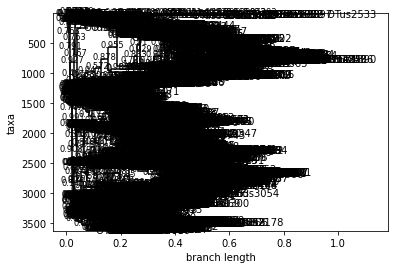

In [108]:
import matplotlib.pylab
Phylo.draw(tree)

### To do:
Biopython cookbook topics that am yet to cover (MSA, etc)